In [20]:
import imgaug.augmenters as iaa 
from PIL import Image 
import numpy as np 
import imgaug as ia
import cv2
import matplotlib.pyplot as plt

In [373]:
seq_1 = iaa.Sequential([
    iaa.Fliplr(1),
iaa.GaussianBlur(sigma = (0,1.1))])
seq_2 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.Multiply((1.2,1.5))
])
seq_3 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.Multiply((1.2,1.5)),
    iaa.Affine(translate_px={"x": 40, "y": 30},
        scale=(0.5, 0.7))
])
seq_4 = iaa.Sequential([
    #iaa.Multiply((1.2,1.5)),
    iaa.AdditiveGaussianNoise()

])
seq_5 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.AdditiveGaussianNoise()
])
seq_6 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.AdditiveLaplaceNoise()
])
seq_7 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.AdditiveGaussianNoise(),
    iaa.Affine(
        scale=(0.8, 0.8))
])
seq_8 = iaa.Sequential([
    iaa.Fliplr(1),
    iaa.AdditiveLaplaceNoise(),
    iaa.Affine(
        scale=(0.8, 0.8))
])
seq_9 = iaa.Sequential([
    iaa.CenterCropToSquare()
])
seq_10 = iaa.Sequential([
    iaa.CenterCropToSquare(),
    iaa.Affine(
        scale=(0.8, 0.8))
    
])
seq_11 = iaa.Sequential([
    iaa.CenterPadToSquare(),
    iaa.GammaContrast()
    
])
seq_12 = iaa.Sequential([
    iaa.GammaContrast(),
    iaa.HorizontalFlip()
    
])
seq_13 = iaa.Sequential([
 iaa.LogContrast()
    
])
seq_14 = iaa.Sequential([
    iaa.MotionBlur(),
    iaa.ShearX(10)
])
seq_15 = iaa.Sequential([
 iaa.LogContrast(),
 iaa.ShearX(10)
    
])
seq_16 = iaa.Sequential([
 iaa.ShearY(20)
    
])
seq_17 = iaa.Sequential([
 iaa.Fliplr(1),
 iaa.ShearY(20)
    
])
seq_18 = iaa.Sequential([
 iaa.Rotate((-10,10))
    
])
seq_19 = iaa.Sequential([
 iaa.Rotate((-10,10)),
 iaa.AdditiveGaussianNoise()
    
])
seq_20 = iaa.Sequential([
 iaa.Fliplr(),
 iaa.Rotate((-10,10)),

    
])

In [374]:
image = Image.open('./IMG20200514184242.jpg')
image 
image = np.array(image)
bbs = ia.BoundingBox(x1=20, y1=81, x2=113, y2=172)

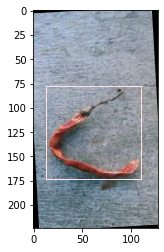

In [375]:
img,box = seq_20(images=[image],bounding_boxes = bbs)
x,y = box[0]
w,h = box[1]
co = [x,y,w,h]
show_image_with_boxes(img[0],co)

In [297]:
co 

[-2.433552, 83.24837, 124.59067, 167.64832]

In [39]:
images = seq(images = [image])

In [40]:
image = Image.fromarray(images[0])

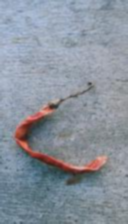

In [17]:
image

In [298]:
def show_image_with_boxes(image,boxes):
    x1,y1,x2,y2 = boxes
    image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,225,225),1)
    plt.imshow(image,cmap = "gray")

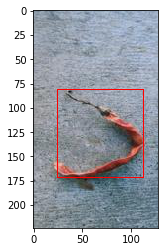

In [172]:
image = Image.open('./IMG20200514184242.jpg')
image 
image = np.array(image)
show_image_with_boxes(image,(25,81,113,172))

In [181]:
img,box = seq_9(images=[image],bounding_boxes = bbs)
x,y = box[0]
w,h = box[1]
co = [x,y,w,h]

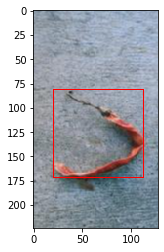

In [182]:
show_image_with_boxes(img[0],co)

In [88]:
box[0]

array([15., 81.], dtype=float32)

In [63]:
box 

[[BoundingBox(x1=35.0000, y1=81.0000, x2=108.0000, y2=91.0000, label=None)]]

In [73]:
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=20, y1=81, x2=113, y2=172),
], shape=image.shape)


In [77]:
img,box = seq(images=[image],bounding_boxes = bbs)

IndexError: list index out of range

In [75]:
bbs.draw_on_image(image[0])

IndexError: too many indices for array

In [376]:
import xml.etree.ElementTree as ET 

In [377]:
root = ET.parse('./IMG20200514184242.xml').getroot()

In [386]:
for i,j in root.items():
    print(i,j)

In [ ]:
def main():
image_path = os.path.join(os.getcwd(), 'annotations')
xml_df = xml_to_csv(image_path)
xml_df.to_csv('raccoon_labels.csv', index=None)
print('Successfully converted xml to csv.')

In [387]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    image_path = os.path.join(os.getcwd(), 'annotations')
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('raccoon_labels.csv', index=None)
    print('Successfully converted xml to csv.')


main()


Successfully converted xml to csv.


In [ ]:
xml_path = home